# FIT5202 - Data processing for Big Data

## Assignment 2: Detecting Linux system hacking activities Part B

Name: Roma Hambar\
Student ID: 31223958\
Python Version Used: Python 3

<h1>Memory Consumer Modelling </h1>

Apache Kafka is an open-source event streaming data platform that is used to publish and subscribe to a stream of data. 
Apache Kafka consumer is an application that is used to retrieve data stored in Kafka producer present in the Kafka cluster. 

Below is the code to visualize the inflow of records read in Kafka consumer from the producer topic 'memory' for a given interval to 2 minutes.

* [Initialize Apache Kafka Consumer](#Initialize)
* [Design Visualization Plot Layout](#Layout)
* [Observe Rate of Data Consumption in Kafka Consumer](#Plotting)
* [Initialize Streaming data from Kafka Topic](#streaming)

In [1]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt

import matplotlib.pyplot as plt
import time

from datetime import datetime as dt

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

## Initialize Apache Kafka Consumer <a class="anchor" name="Initialize"></a>

Using `KafkaConsumer` function from Kafka package, set the consumer configuartion and initialise Kafka consumer in local mode.

In [2]:
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # read only latest records in topic
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

## Design Visualization Plot Layout <a class="anchor" name="Layout"></a>

Design the Real-time streaming data visualization plot layout using the matplotlib functions

In [12]:
def init_plots():
    try:
        width = 9.5
        height = 6
        # create new figure
        fig = plt.figure(figsize=(width,height)) 
        # adding the subplot axes to the given grid position
        ax = fig.add_subplot(111) 
        fig.suptitle('Real-time uniform stream data visualization (Memory Consumer)')
        ax.set_xlabel('Time')
        ax.set_ylabel('Count of Memory consumer records')
        
        fig.show() 
        fig.canvas.draw() 
        return fig, ax
    except Exception as ex:
        print(str(ex))

## Observe Rate of Data Consumption in Kafka Consumer  <a class="anchor" name="Plotting"></a>

Kafka producer has been streaming data records for each machine with split duration of 5 seconds. Read the data records for each machine in consumer by parsing the list of sublists of dictionary records. Count the number of dictionary records for each madhine and plot their count for the last two-minutes.

In [4]:
# Initialize lists to X- axis timestamp values and machine record count in rest of the y lists per machine
x, y_4, y_5, y_6, y_7, y_8 = [],[],[],[],[],[]

In [13]:
# While true will keep the loop active for infinite time to capture streaming records indefinitely
# Read consumer records stored in a list
# Parse the sublist with dictionary records. Read the records in utf-8 file encoding format
# count the number of records in each list for each machine and append the records to y list
# We have to plot the realtime count of each machine record for the last 2 minutes.
# 2 minutes have 120 seconds in it and each process data record cycle streams data after every 10 seconds.
# There will (120/10) timestamps in the 2 min interval
# Keep on removing the initial values to observe incoming streaming data in realtime
def consume_message_only(consumer,fig,ax): 
    while True: 
        try:
            # print('Waiting for messages')
            for message in consumer:
                count_4 = 0 
                count_5 = 0
                count_6 = 0
                count_7 = 0
                count_8 = 0

                for m in eval(message.value.decode('utf-8')):
                    if int(m[0]['machine']) == 4:
                        count_4 += len(m)
                    elif int(m[0]['machine']) == 5:
                        count_5 += len(m)
                    elif int(m[0]['machine']) == 6:
                        count_6 += len(m)
                    elif int(m[0]['machine']) == 7:
                        count_7 += len(m)
                    elif int(m[0]['machine']) == 8:
                        count_8 += len(m)

                y_4.append(count_4)
                y_5.append(count_5)
                y_6.append(count_6)
                y_7.append(count_7)
                y_8.append(count_8)

                x.append(dt.utcnow().strftime("%X"))

                if len(x) >= (120/5):
                    ax.clear()
                    ax.plot(x, y_4, label= 'Machine 4')
                    ax.plot(x, y_5, label= 'Machine 5')
                    ax.plot(x, y_6, label= 'Machine 6')
                    ax.plot(x, y_7, label= 'Machine 7')
                    ax.plot(x, y_8, label= 'Machine 8')
                    plt.xticks(rotation=45)
                    plt.legend(loc="upper right")
                    ax.set_ylim(0,1) 
                    ax.set_yticks([0,20,40,60,80,100])
                    fig.canvas.draw()
                    x.pop(0) 
                    y_4.pop(0)
                    y_5.pop(0)
                    y_6.pop(0)
                    y_7.pop(0)
                    y_8.pop(0)
                    
            plt.close('all')
        except Exception as ex:
            print(str(ex))

## Initialize Streaming data from Kafka Topic <a class="anchor" name="Streaming"></a>

<IPython.core.display.Javascript object>


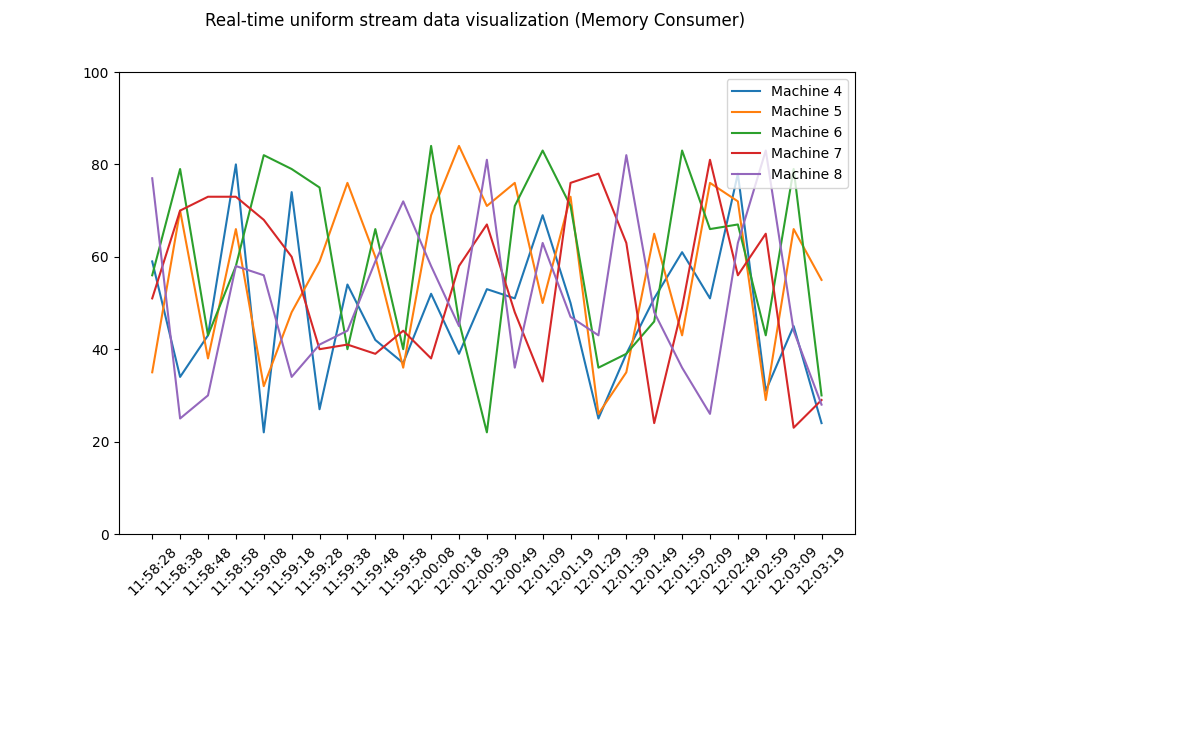

In [ ]:
# Kafka topic to subcribe to 
topic = 'memory'
# initialize consumer
consumer = connect_kafka_consumer()
# plot layout
fig, ax = init_plots()
# Observe rate of consumption of kafka records
consume_message_only(consumer, fig, ax)  